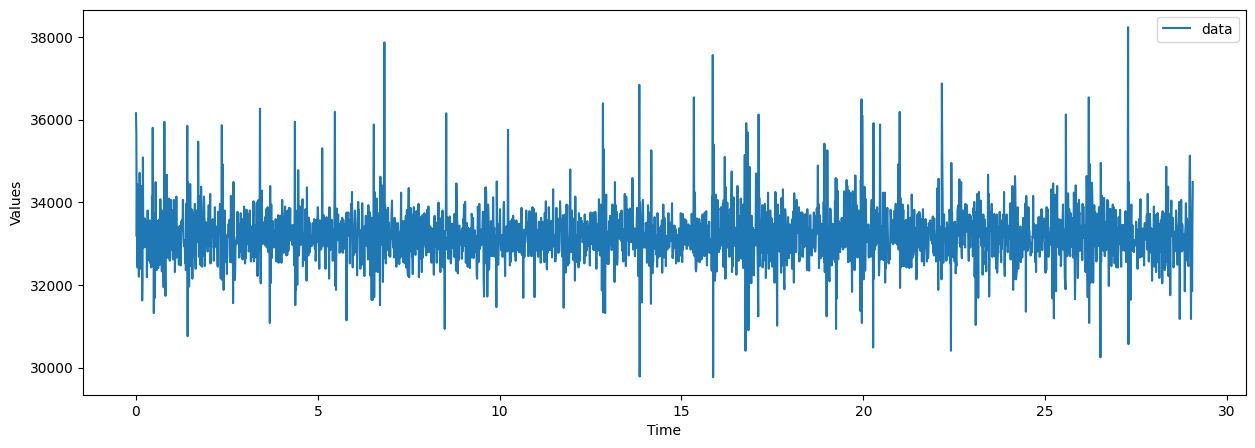

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read file
data = pd.read_csv('v3_herz_3.csv')

# X, Y, Z-Werte aus der CSV-Datei extrahieren
d_values = data['D ']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 1 Millisekunden pro Eintrag

# Create a figure and set its size to 15x5 in.
fig, ax2 = plt.subplots(figsize=(15,5))

# Plot a line chart
ax2.plot(time_series, d_values, label='data')
ax2.set_xlabel('Time')
ax2.set_ylabel('Values')
ax2.legend()

# Show plot
plt.show()